##Montando o Ambiente conectando Drive ao Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Preparando o Ambiente (Se for a primeira vez)

In [ ]:
'''
%cd /content/drive/My\ Drive/
!git clone https://github.com/NVlabs/stylegan2-ada
%cd stylegan2-ada
!mkdir pkl
%cd pkl
!gdown --id 1JLqXE5bGZnlu2BkbLPD5_ZxoO3Nz-AvF
%cd ../
%mkdir datasets
'''

**Preparando o seu dataset**

StyleGAN utiliza de um formato de tensorflow conhecido como **tfrecords**. A ideia aqui é converter as imagens que você possua para esse formato



In [ ]:
'''source: https://pycheat.com/resize_img.php '''

import glob
from PIL import Image

#Insira o nome da sua pasta onde estão os seus dados
imageNames = glob.glob(r"datasets/tudo/*.jpg")

#Coloque aqui o tamanho da sua imagem. É necessário que a imagem seja em potência de dois.
new_width  = 64
new_height = 64

count=0

for i in imageNames:
    img = Image.open(i)
    img = img.resize((new_width, new_height), Image.ANTIALIAS)
    img.save(r"datasets/custom/"+str(count)+".jpg") 
    count+=1
    print(i)
    print("Images Resized " +str(count)+"/"+str(len(imageNames)),end='\r')

**Execute o comando abaixo para converter as imagens no arquivo tfrecords**

In [ ]:
!python dataset_tool.py create_from_images ./datasets/custom_tf ./datasets/custom

Loading images from "./datasets/custom"
100% 2159/2159 [00:07<00:00, 294.93it/s]


In [ ]:
!ls datasets/custom_tf/

##Utilize essa seção caso não seja a primeira vez

In [ ]:
#USE this if you already have a stylegan2 folder in google drive
%cd /content/drive/My\ Drive/stylegan2-ada


/content/drive/My Drive/stylegan2-ada


In [ ]:
!pwd

/content/drive/My Drive/stylegan2-ada


**Utilize o Tensorflow na versão 1.x**:

Requerimento para utilizar o Stylegan. O google colab utiliza o tensorflow na na versão 2.x, por padrão

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


##Treinamento

In [ ]:
!python train.py --outdir=./my_results --gpus=1 --data=./datasets/custom_tf --resume=./my_results/00010-custom_tf-auto1-resumecustom/network-snapshot-000204.pkl --snap=25


tcmalloc: large alloc 4294967296 bytes == 0x7d06000 @  0x7f9e2174a001 0x7f9e1e973765 0x7f9e1e9d7bb0 0x7f9e1e9d9a4f 0x7f9e1ea70048 0x50a4a5 0x50cc96 0x507be4 0x508ec2 0x594a01 0x549e8f 0x5515c1 0x5a9dac 0x50a433 0x50cc96 0x507be4 0x588e5c 0x59fd0e 0x50d256 0x507be4 0x588e5c 0x59fd0e 0x50d256 0x507be4 0x588e5c 0x59fd0e 0x50d256 0x5095c8 0x50a2fd 0x50beb4 0x507be4
tcmalloc: large alloc 4294967296 bytes == 0x7f9c4f2c4000 @  0x7f9e217481e7 0x7f9e1e9735e1 0x7f9e1e9d7c78 0x7f9e1e9d7f37 0x7f9e1ea6ff28 0x50a4a5 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50cc96 0x5095c8 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4
tcmalloc: large alloc 4294967296 bytes == 0x7f9b4e2c2000 @  0x7f9e217481e7 0x7f9e1e9735e1 0x7f9e1e9d7c78 0x7f9e1e9d7f37 0x7f9ddc9dd0c5 0x7f9ddc360902 0x7f9ddc360eb2 0x7f9ddc319c3e 0x50a12f 0x50beb4 0x5095c8 0x50a2fd 0x50beb4 0x507be4 0x588c8b 0x59fd0e 0x50d256 0x507b

#Gerando Imagens

In [ ]:
!python generate.py --outdir=./results/fake_images --trunc=1 --network=./my_results/00011-custom_tf-auto1-resumecustom/network-snapshot-000307.pkl --seeds=1000-3200

Loading networks from "./my_results/00011-custom_tf-auto1-resumecustom/network-snapshot-000307.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Compiling... Loading... Done.
Generating image for seed 1000 (0/2201) ...
Generating image for seed 1001 (1/2201) ...
Generating image for seed 1002 (2/2201) ...
Generating image for seed 1003 (3/2201) ...
Generating image for seed 1004 (4/2201) ...
Generating image for seed 1005 (5/2201) ...
Generating image for seed 1006 (6/2201) ...
Generating image for seed 1007 (7/2201) ...
Generating image for seed 1008 (8/2201) ...
Generating image for seed 1009 (9/2201) ...
Generating image for seed 1010 (10/2201) ...
Generating image for seed 1011 (11/2201) ...
Generating image for seed 1012 (12/2201) ...
Generating image for seed 1013 (13/2201) ...
Generating image for seed 1014 (14/2201) ...
Generating image for seed 1015 (15/2201) ...
Generating image for seed 1016 

In [ ]:
!zip -r generated-0.7.zip /content/stylegan2/results/00000-generate-images

#Avaliando e plotando metrica

No handles with labels found to put in legend.


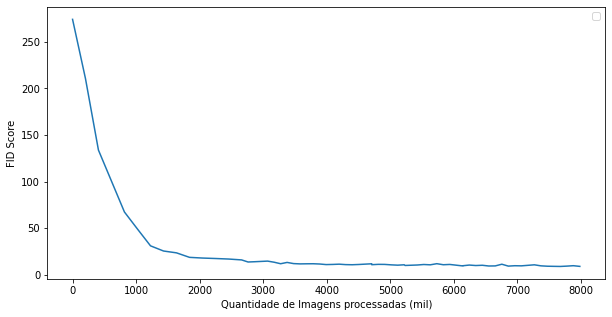

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
kimg = np.array([1,204,408,817,1022,1227,1432,1636,1841,2046,2251,
        2456,2660,2762,2864,3069,3172,3274,3376,3478,3581,3683,
        3786,3888,3990,4093,4195,4297,4399,4502,4707,4707,4809,
        4911,5014,5116,5219,5231,5423,5526,5628,5731,5833,5935,
        6139,6139,6242,6344,6447,6549,6651,6754,6856,6958,
        7061,7266,7368,7470,7572,7674,7776,7879,7981])

fid50k_full = [274.2201,210.6387,133.8057,67.2819,48.9665,30.9329,25.3683,23.3908,18.5565,
               17.8040,17.3091,16.7438,15.8079,13.5676,13.8517,14.5210,13.3261,11.7025,
               13.1075,11.8500,11.5318,11.6363,11.6910,11.4045,10.7924,10.9477,11.2270,
               10.7574,10.6176,10.8915,11.6458,10.6690,11.0358,10.9774,10.4978,10.1558,
               10.5696,9.8541,10.3299,10.8689,10.5405,11.7445,10.6223,10.9320,9.3465,
               9.5252,10.2746,9.7682,10.0520,9.2671,9.3640,11.1744,9.1512,9.5645,
               9.4335,10.5387,9.4409,9.0369,8.8987,8.7879,9.1371,9.5851,8.8601]

plt.figure(figsize=(10,5))
plt.plot(kimg,fid50k_full)
plt.xlabel("Quantidade de Imagens processadas (mil)")
plt.ylabel("FID Score")
plt.legend()
plt.show()